<a href="https://colab.research.google.com/github/zaegeon/Project/blob/main/code/Apple_Code_Arrange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import sklearn

In [ ]:
# version check
print('np version :', np.__version__) # np version : 1.23.1
print('cv2 version :', cv2.__version__) # cv2 version : 4.6.0
import pkg_resources
print('matplotlib version :', pkg_resources.get_distribution('matplotlib').version) # matplotlib version : 3.5.2
print('scikit-learn version : ', sklearn.__version__) # scikit-learn version :  1.0.2

np version : 1.21.6
cv2 version : 4.6.0
matplotlib version : 3.2.2
scikit-learn version :  1.0.2


In [ ]:
!python --version # Colab - 3.7.13

Python 3.7.13


# (2) Image 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
file_path = '/content/gdrive/MyDrive/ColabNotebooks/darknet/apple' # apple image file path
path = './'
os.chdir(file_path) # Apple Image가 있는 폴더로 경로 변경
file_lst = os.listdir(path)

In [ ]:
apple_lst = []
for file in file_lst:
    apple_lst.append(plt.imread(file))

In [ ]:
os.chdir('/content/gdrive/MyDrive/ColabNotebooks/darknet/custom/')

# (3) X, y

일반(0)과 병든 사과(1) 각각 500개들 중 80%를 train set, 20%를 test set으로 설정 & txt 파일로 저장

In [ ]:
# train, test txt file
# import random as rd
#
# all_num = list(np.arange(1, 501))
# train_num = rd.sample(all_num, int(len(all_num) * 0.8))
# test_num = list(set(all_num).difference(train_num))
# f = open('train.txt', 'w') # train.txt 생성
# for i in range(0,2):
#     for n in train_num:
#         data = path + 'apple_' + str(i) +'_' + format(n, '03') + '.jpg\n'
#         f.write(data)
# f.close()
#
# f = open('test.txt', 'w') # test.txt 생성
# for i in range(0,2):
#     for n in test_num:
#         data = path + 'apple_' + str(i) +'_' + format(n, '03') + '.jpg\n'
#         f.write(data)
# f.close()

In [ ]:
X_tr = []
with open('train.txt', mode='rt') as f:
    for line in f:
        l = line.strip()
        train_num = file_path + '/' + l[-15:]
        X_tr.append(cv2.imread(train_num))
X_tr = np.asarray(X_tr)

In [ ]:
X_te = []
with open('test.txt', mode='rt') as f:
    for line in f:
        l = line.strip()
        test_num = file_path + '/' + l[-15:]
        X_te.append(cv2.imread(test_num))
X_te = np.asarray(X_te)

In [ ]:
y_tr = []
with open('train.txt', mode='rt') as f:
    for line in f:
        a = line.strip()
        y_tr.append(int(a[-9:-8]))
y_tr = np.asarray(y_tr)

y_te = []
with open('test.txt', mode='rt') as f:
    for line in f:
        a = line.strip()
        y_te.append(int(a[-9:-8]))
y_te = np.asarray(y_te)

In [ ]:
print(X_tr.shape, X_te.shape, y_tr.shape, y_te.shape) # shape check

(800, 256, 256, 3) (200, 256, 256, 3) (800,) (200,)


In [ ]:
# Scaling (0 ~ 255 → [0, 1) int)
X_tr = X_tr / 255
X_te = X_te / 255

In [ ]:
# Reshape for analysis
X_tr_rs = X_tr.reshape(800, -1)
X_te_rs = X_te.reshape(200, -1)
print(X_tr_rs.shape, X_te_rs.shape)

(800, 196608) (200, 196608)


#(4) Classification model

## 1. K-Neighbors Classifier

In [ ]:
# KNN : 계산 시 시간이 오래 걸림
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_jobs=-1)
knn.fit(X_tr_rs, y_tr)
print('=== KNeighborsClassifier n_neighbors = 5 (default) ===')
print('KNN Score (Train) :', knn.score(X_tr_rs, y_tr)) # train score : 0.71
print('KNN Score (Test) :', knn.score(X_te_rs, y_te)) # test score : 0.645

=== KNeighborsClassifier n_neighbors = 5 (default) ===
KNN Score (Train) : 0.71
KNN Score (Test) : 0.645


**neighbors plot**

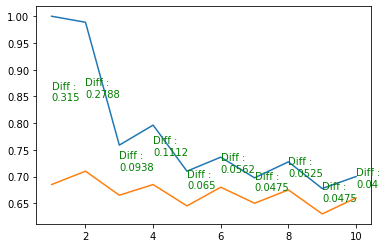

In [ ]:
# KNN plot - neighbors 개수에 따른 score 시각화
tr_score = []
te_score = []
neighbors = range(1, 11)
for x in neighbors:
    knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=x)
    knn.fit(X_tr_rs, y_tr)
    tr_score.append(knn.score(X_tr_rs, y_tr))
    te_score.append(knn.score(X_te_rs, y_te))

plt.plot(neighbors, tr_score, label='Train Score')
plt.plot(neighbors, te_score, label='Test Score')
for i in range(len(tr_score)):
    plt.text(neighbors[i], ( tr_score[i] + te_score[i] )/ 2 , f'Diff : \n{round((tr_score[i] - te_score[i]), 4)}', color='green')
plt.show()
# n=4 ⇒ low diff & high accuracy ∴ best

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)
knn.fit(X_tr_rs, y_tr)
print('=== KNeighbors Classifier n_neighbors = 4 (best) ===')
print('KNN Score (Train) :', knn.score(X_tr_rs, y_tr)) # train score : 0.79624
print('KNN Score (Test) :', knn.score(X_te_rs, y_te)) # test score : 0.685

=== KNeighbors Classifier n_neighbors = 4 (best) ===
KNN Score (Train) : 0.79625
KNN Score (Test) : 0.685


In [ ]:
# confusion matrix (train, knn)
from sklearn.metrics import confusion_matrix, classification_report

tr_pred_knn = knn.predict(X_tr_rs)
cm_knn = confusion_matrix(y_tr, tr_pred_knn)
print(cm_knn)

[[243 157]
 [  6 394]]


In [ ]:
# classification report (train, knn)
print(classification_report(y_tr, tr_pred_knn, target_names=['Apple','DmgApple']))

              precision    recall  f1-score   support

       Apple       0.98      0.61      0.75       400
    DmgApple       0.72      0.98      0.83       400

    accuracy                           0.80       800
   macro avg       0.85      0.80      0.79       800
weighted avg       0.85      0.80      0.79       800



In [ ]:
# confusion matrix, classification report (test, knn)
te_pred_knn = knn.predict(X_te_rs)
print(confusion_matrix(y_te, te_pred_knn))
print(classification_report(y_te, te_pred_knn, target_names=['Apple','DmgApple']))

[[43 57]
 [ 6 94]]
              precision    recall  f1-score   support

       Apple       0.88      0.43      0.58       100
    DmgApple       0.62      0.94      0.75       100

    accuracy                           0.69       200
   macro avg       0.75      0.68      0.66       200
weighted avg       0.75      0.69      0.66       200



##2. SGD Classifier

In [ ]:
# SGD Classifier (hinge)
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='hinge', max_iter=30)
sgd.fit(X_tr_rs, y_tr)
print('=== SGD Classifier (hinge) ===')
print('SGD Score (Train) :', sgd.score(X_tr_rs, y_tr)) # train score : 1.0
print('SGD Score (Test) :', sgd.score(X_te_rs, y_te)) # test score : 0.91

=== SGD Classifier (hinge) ===
SGD Score (Train) : 1.0
SGD Score (Test) : 0.9


In [ ]:
# confusion matrix (train, sgd, 'hinge')
tr_pred_sgd = sgd.predict(X_tr_rs)
cm_sgd = confusion_matrix(y_tr, tr_pred_sgd)
print(cm_sgd)

[[400   0]
 [  0 400]]


In [ ]:
# classification report (train, sgd, 'hinge')
print(classification_report(y_tr, tr_pred_sgd, target_names=['Apple','DmgApple']))

              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00       400
    DmgApple       1.00      1.00      1.00       400

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [ ]:
# confusion matrix, classification report (test, sgd, 'hinge')
te_pred_sgd = sgd.predict(X_te_rs)
print(confusion_matrix(y_te, te_pred_sgd))
print(classification_report(y_te, te_pred_sgd, target_names=['Apple','DmgApple']))

[[85 15]
 [ 5 95]]
              precision    recall  f1-score   support

       Apple       0.94      0.85      0.89       100
    DmgApple       0.86      0.95      0.90       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



In [ ]:
# SGD Classifier (log)
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', max_iter=30)
sgd.fit(X_tr_rs, y_tr)
print('=== SGD Classifier (log_loss) ===')
print('SGD Score (Train) :', sgd.score(X_tr_rs, y_tr)) # train score : 1.0
print('SGD Score (Test) :', sgd.score(X_te_rs, y_te)) # test score : 0.92

=== SGD Classifier (log_loss) ===
SGD Score (Train) : 1.0
SGD Score (Test) : 0.905


In [ ]:
# confusion matrix (train, sgd, 'log')
tr_pred_sgd = sgd.predict(X_tr_rs)
cm_sgd = confusion_matrix(y_tr, tr_pred_sgd)
print(cm_sgd)

[[400   0]
 [  0 400]]


In [ ]:
# classification report (train, sgd, 'log')
print(classification_report(y_tr, tr_pred_sgd, target_names=['Apple','DmgApple']))

              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00       400
    DmgApple       1.00      1.00      1.00       400

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [ ]:
# confusion matrix, classification report (test, sgd, 'log')
te_pred_sgd = sgd.predict(X_te_rs)
print(confusion_matrix(y_te, te_pred_sgd))
print(classification_report(y_te, te_pred_sgd, target_names=['Apple','DmgApple']))

[[88 12]
 [ 7 93]]
              precision    recall  f1-score   support

       Apple       0.93      0.88      0.90       100
    DmgApple       0.89      0.93      0.91       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.90       200



##3. Logistic Regression

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(n_jobs=-1, max_iter=30)
lr.fit(X_tr_rs, y_tr)
print('=== Logistic Regression ===')
print('Logistic Regression Score (Train) :', lr.score(X_tr_rs, y_tr)) # train score : 1.0
print('Logistic Regression Score (Test) :', lr.score(X_te_rs, y_te)) # test score : 0.915

=== Logistic Regression ===
Logistic Regression Score (Train) : 1.0
Logistic Regression Score (Test) : 0.915


In [ ]:
# confusion matrix (train, logistic)
tr_pred_lr = lr.predict(X_tr_rs)
cm_lr = confusion_matrix(y_tr, tr_pred_lr)
print(cm_lr)

[[400   0]
 [  0 400]]


In [ ]:
# classification report (train, logistic)
print(classification_report(y_tr, tr_pred_lr, target_names=['Apple','DmgApple']))

              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00       400
    DmgApple       1.00      1.00      1.00       400

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [ ]:
# confusion matrix, classification report (test, logistic)
te_pred_lr = lr.predict(X_te_rs)
print(confusion_matrix(y_te, te_pred_lr))
print(classification_report(y_te, te_pred_lr, target_names=['Apple','DmgApple']))

[[87 13]
 [ 4 96]]
              precision    recall  f1-score   support

       Apple       0.96      0.87      0.91       100
    DmgApple       0.88      0.96      0.92       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.91       200



#(5) PCA

In [ ]:
from sklearn.decomposition import PCA
pca_rgb = []
for i in X_tr:
    b, g, r = cv2.split(i)
    r = r / 255
    g = g / 255
    b = b / 255
    pca_r = PCA(n_components=32)
    pca_r_tran = pca_r.fit_transform(r)
    pca_g = PCA(n_components=32)
    pca_g_tran = pca_g.fit_transform(g)
    pca_b = PCA(n_components=32)
    pca_b_tran = pca_b.fit_transform(b)

    pca_r_org = pca_r.inverse_transform(pca_r_tran)
    pca_g_org = pca_g.inverse_transform(pca_g_tran)
    pca_b_org = pca_b.inverse_transform(pca_b_tran)

    pca_img = cv2.merge((pca_r_org, pca_g_org, pca_b_org))
    pca_rgb.append(pca_img)

In [ ]:
from sklearn.decomposition import PCA
pca_rgb_te = []
for i in X_te:
    b, g, r = cv2.split(i)
    r = r / 255
    g = g / 255
    b = b / 255
    pca_r = PCA(n_components=32)
    pca_r_tran = pca_r.fit_transform(r)
    pca_g = PCA(n_components=32)
    pca_g_tran = pca_g.fit_transform(g)
    pca_b = PCA(n_components=32)
    pca_b_tran = pca_b.fit_transform(b)

    pca_r_org = pca_r.inverse_transform(pca_r_tran)
    pca_g_org = pca_g.inverse_transform(pca_g_tran)
    pca_b_org = pca_b.inverse_transform(pca_b_tran)

    pca_img = cv2.merge((pca_r_org, pca_g_org, pca_b_org))
    pca_rgb_te.append(pca_img)

In [ ]:
pca_rgb_tr = np.asarray(pca_rgb)
pca_rgb_tr = pca_rgb_tr.reshape((800, -1))
pca_rgb_te = np.asarray(pca_rgb_te)
pca_rgb_te = pca_rgb_te.reshape((200, -1))
print(pca_rgb_tr.shape, pca_rgb_te.shape)

(800, 196608) (200, 196608)


## 1. K-Neighbors Classifier After PCA process

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)
knn.fit(pca_rgb_tr, y_tr)
print('=== KNeighbors Classifier, n_neighbors = 4, PCA O ===')
print('KNN Score (Train) :', knn.score(pca_rgb_tr, y_tr)) # train score : 0.80125
print('KNN Score (Test) :', knn.score(pca_rgb_te, y_te)) # test score : 0.69

=== KNeighbors Classifier, n_neighbors = 4, PCA O ===
KNN Score (Train) : 0.80125
KNN Score (Test) : 0.69


In [ ]:
# confusion matrix, classification report (train, knn, PCA)
tr_pred_knn_pca = knn.predict(pca_rgb_tr)
print(confusion_matrix(y_tr, tr_pred_knn_pca))
print(classification_report(y_tr, tr_pred_knn_pca, target_names=['Apple','DmgApple']))

[[250 150]
 [  9 391]]
              precision    recall  f1-score   support

       Apple       0.97      0.62      0.76       400
    DmgApple       0.72      0.98      0.83       400

    accuracy                           0.80       800
   macro avg       0.84      0.80      0.79       800
weighted avg       0.84      0.80      0.79       800



In [ ]:
# confusion matrix, classification report (test, knn, PCA)
te_pred_knn_pca = knn.predict(pca_rgb_te)
print(confusion_matrix(y_te, te_pred_knn_pca))
print(classification_report(y_te, te_pred_knn_pca, target_names=['Apple','DmgApple']))

[[44 56]
 [ 6 94]]
              precision    recall  f1-score   support

       Apple       0.88      0.44      0.59       100
    DmgApple       0.63      0.94      0.75       100

    accuracy                           0.69       200
   macro avg       0.75      0.69      0.67       200
weighted avg       0.75      0.69      0.67       200



##2. SGD Classifier After PCA process

In [ ]:
sgd = SGDClassifier(loss='hinge', max_iter=30)
sgd.fit(pca_rgb_tr, y_tr)
print('=== SGD Classifier, PCA O (hinge) ===')
print('SGD Score (Train) :', sgd.score(pca_rgb_tr, y_tr)) # train score : 0.97375
print('SGD Score (Test) :', sgd.score(pca_rgb_te, y_te)) # test score : 0.92

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


=== SGD Classifier, PCA O (hinge) ===
SGD Score (Train) : 0.9725
SGD Score (Test) : 0.91


In [ ]:
# confusion matrix, classification report (train, sgd, 'hinge', PCA)
tr_pred_sgd_pca = sgd.predict(pca_rgb_tr)
print(confusion_matrix(y_tr, tr_pred_sgd_pca))
print(classification_report(y_tr, tr_pred_sgd_pca, target_names=['Apple','DmgApple']))

[[390  10]
 [ 12 388]]
              precision    recall  f1-score   support

       Apple       0.97      0.97      0.97       400
    DmgApple       0.97      0.97      0.97       400

    accuracy                           0.97       800
   macro avg       0.97      0.97      0.97       800
weighted avg       0.97      0.97      0.97       800



In [ ]:
# confusion matrix, classification report (test, sgd, 'hinge', PCA)
te_pred_sgd_pca = sgd.predict(pca_rgb_te)
print(confusion_matrix(y_te, te_pred_sgd_pca))
print(classification_report(y_tr, tr_pred_sgd_pca, target_names=['Apple','DmgApple']))

[[88 12]
 [ 6 94]]
              precision    recall  f1-score   support

       Apple       0.97      0.97      0.97       400
    DmgApple       0.97      0.97      0.97       400

    accuracy                           0.97       800
   macro avg       0.97      0.97      0.97       800
weighted avg       0.97      0.97      0.97       800



In [ ]:
sgd = SGDClassifier(loss='log', max_iter=30)
sgd.fit(pca_rgb_tr, y_tr)
print('=== SGD Classifier, PCA O (log) ===')
print('SGD Score (Train) :', sgd.score(pca_rgb_tr, y_tr)) # train score : 0.95375
print('SGD Score (Test) :', sgd.score(pca_rgb_te, y_te)) # test score : 0.92

=== SGD Classifier, PCA O (log) ===
SGD Score (Train) : 0.9575
SGD Score (Test) : 0.925


In [ ]:
# confusion matrix, classification report (train, sgd, 'log', PCA)
tr_pred_sgd_pca = sgd.predict(pca_rgb_tr)
print(confusion_matrix(y_tr, tr_pred_sgd_pca))
print(classification_report(y_tr, tr_pred_sgd_pca, target_names=['Apple','DmgApple']))

[[392   8]
 [ 26 374]]
              precision    recall  f1-score   support

       Apple       0.94      0.98      0.96       400
    DmgApple       0.98      0.94      0.96       400

    accuracy                           0.96       800
   macro avg       0.96      0.96      0.96       800
weighted avg       0.96      0.96      0.96       800



In [ ]:
# confusion matrix, classification report (test, sgd, 'hinge', PCA)
te_pred_sgd_pca = sgd.predict(pca_rgb_te)
print(confusion_matrix(y_te, te_pred_sgd_pca))
print(classification_report(y_tr, tr_pred_sgd_pca, target_names=['Apple','DmgApple']))

[[94  6]
 [ 9 91]]
              precision    recall  f1-score   support

       Apple       0.94      0.98      0.96       400
    DmgApple       0.98      0.94      0.96       400

    accuracy                           0.96       800
   macro avg       0.96      0.96      0.96       800
weighted avg       0.96      0.96      0.96       800



##3. Logistic Regression After PCA process

In [ ]:
lr = LogisticRegression(max_iter=30, n_jobs=-1)
lr.fit(pca_rgb_tr, y_tr)
print('=== Logistic Regression, PCA O ===')
print('Logistic Regression Score (Train) :', lr.score(pca_rgb_tr, y_tr)) # train score : 0.89875
print('Logistic Regression Score (Test) :', lr.score(pca_rgb_te, y_te)) # test score : 0.86

=== Logistic Regression, PCA O ===
Logistic Regression Score (Train) : 0.89875
Logistic Regression Score (Test) : 0.86


In [ ]:
# confusion matrix, classification report (train, logistic, PCA)
tr_pred_lr_pca = lr.predict(pca_rgb_tr)
print(confusion_matrix(y_tr, tr_pred_lr_pca))
print(classification_report(y_tr, tr_pred_lr_pca, target_names=['Apple','DmgApple']))

[[365  35]
 [ 46 354]]
              precision    recall  f1-score   support

       Apple       0.89      0.91      0.90       400
    DmgApple       0.91      0.89      0.90       400

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



In [ ]:
# confusion matrix, classification report (test, logistic, PCA)
te_pred_lr_pca = lr.predict(pca_rgb_te)
print(confusion_matrix(y_te, te_pred_lr_pca))
print(classification_report(y_te, te_pred_lr_pca, target_names=['Apple','DmgApple']))

[[85 15]
 [13 87]]
              precision    recall  f1-score   support

       Apple       0.87      0.85      0.86       100
    DmgApple       0.85      0.87      0.86       100

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



#(6) CNN

In [ ]:
# Imports
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

In [ ]:
print('Tensorflow version :', tf.__version__) # Tensorflow version : 2.8.2
print('keras version :', pkg_resources.get_distribution('keras').version) # keras version : 2.8.0

Tensorflow version : 2.8.2
keras version : 2.8.0


In [ ]:
# Create Keras Model
model = keras.Sequential()
model.add(keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=2, activation='softmax'))

In [ ]:
# Compile
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 254016)            0

In [ ]:
# Create Validation Data
os.chdir('/content/gdrive/MyDrive/ColabNotebooks/darknet/apple_img/apple_val')
path = './'
file_lst = os.listdir(path)

X_val = []
for i in range(len(file_lst)):
  X_val.append(cv2.imread(file_lst[i]))
X_val = np.asarray(X_val)

y_val = []
for i in range(len(file_lst)):
  y_val.append(int(file_lst[i][-9:-8]))
y_val = np.asarray(y_val)

print(X_val.shape, y_val.shape)

(185, 256, 256, 3) (185,)


In [ ]:
history = model.fit(X_tr, y_tr, epochs=10, validation_data = (X_val, y_val))
print('Train Score :', round(history.history['sparse_categorical_accuracy'][-1], 4)) # train score : 0.97

Epoch 1/10
25/25 [==============================] - 14s 71ms/step - loss: 0.8293 - sparse_categorical_accuracy: 0.7962 - val_loss: 126.1254 - val_sparse_categorical_accuracy: 0.8162
Epoch 2/10
25/25 [==============================] - 1s 52ms/step - loss: 0.1671 - sparse_categorical_accuracy: 0.9312 - val_loss: 101.3144 - val_sparse_categorical_accuracy: 0.8270
Epoch 3/10
25/25 [==============================] - 1s 50ms/step - loss: 0.1219 - sparse_categorical_accuracy: 0.9500 - val_loss: 137.1705 - val_sparse_categorical_accuracy: 0.8270
Epoch 4/10
25/25 [==============================] - 1s 53ms/step - loss: 0.1136 - sparse_categorical_accuracy: 0.9563 - val_loss: 107.4217 - val_sparse_categorical_accuracy: 0.8541
Epoch 5/10
25/25 [==============================] - 1s 50ms/step - loss: 0.0957 - sparse_categorical_accuracy: 0.9688 - val_loss: 109.3383 - val_sparse_categorical_accuracy: 0.8595
Epoch 6/10
25/25 [==============================] - 1s 54ms/step - loss: 0.0440 - sparse_categ

In [ ]:
best_model = history.model

# Test Set Accuracy
pred_prob = best_model.predict(X_te)
te_pred = np.argmax(pred_prob, axis=1)
print('Test Score :', np.mean(y_te == te_pred)) # test score : 0.935

Test Score : 0.93


In [ ]:
# Validation Set Accuracy
pred_prob_val = best_model.predict(X_val)
val_pred = np.argmax(pred_prob_val, axis=1)
print('Validation Score :', round(np.mean(y_val == val_pred), 4)) # validaion score : 0.8703

Validation Score : 0.8595


In [ ]:
# Crawling Data Accuracy
y_val_search = np.concatenate((y_val[91:101], y_val[-10:]), axis=0)
val_pred_search = np.concatenate((val_pred[91:101], val_pred[-10:]), axis=0)
print('Crawling Data Accuracy :', np.mean(y_val_search == val_pred_search)) # Crawling Data Accuracy : 0.75

Crawling Data Accuracy : 0.75


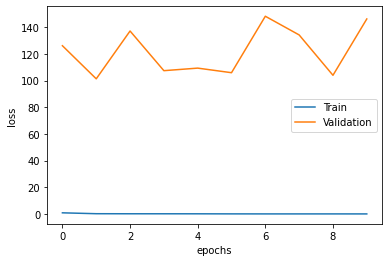

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.show()

#(7) YOLO

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!ls -la "/content/gdrive/MyDrive/ColabNotebooks/darknet"

total 40
drwx------ 2 root root 4096 Jul 28 05:19 apple
drwx------ 2 root root 4096 Jul 21 15:28 apple_img
drwx------ 2 root root 4096 Jul 22 01:06 backup
drwx------ 2 root root 4096 Jul 20 09:21 bin
drwx------ 2 root root 4096 Jul 20 15:07 cfg
drwx------ 2 root root 4096 Jul 20 05:22 cuDNN
drwx------ 2 root root 4096 Jul 20 08:45 custom
drwx------ 2 root root 4096 Jul 20 15:16 data
drwx------ 2 root root 4096 Jul 20 07:02 .ipynb_checkpoints
drwx------ 2 root root 4096 Jul 20 07:26 weights


##1. Install CUDA, cuDNN

Download cuDNN File https://developer.nvidia.com/rdp/cudnn-download

Unzip the cuDNN from Google Drive to Colab /usr/local/cuda folder

In [4]:
!tar -xzvf /content/gdrive/MyDrive/ColabNotebooks/darknet/cuDNN/cudnn-11.1-linux-x64-v8.0.4.30.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

!cat /usr/local/cuda/include/cudnn_version.h | grep CUDNN_MAJOR -A 2 # check version

cuda/include/cudnn.h
cuda/include/cudnn_adv_infer.h
cuda/include/cudnn_adv_train.h
cuda/include/cudnn_backend.h
cuda/include/cudnn_cnn_infer.h
cuda/include/cudnn_cnn_train.h
cuda/include/cudnn_ops_infer.h
cuda/include/cudnn_ops_train.h
cuda/include/cudnn_version.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.8
cuda/lib64/libcudnn.so.8.0.4
cuda/lib64/libcudnn_adv_infer.so
cuda/lib64/libcudnn_adv_infer.so.8
cuda/lib64/libcudnn_adv_infer.so.8.0.4
cuda/lib64/libcudnn_adv_train.so
cuda/lib64/libcudnn_adv_train.so.8
cuda/lib64/libcudnn_adv_train.so.8.0.4
cuda/lib64/libcudnn_cnn_infer.so
cuda/lib64/libcudnn_cnn_infer.so.8
cuda/lib64/libcudnn_cnn_infer.so.8.0.4
cuda/lib64/libcudnn_cnn_train.so
cuda/lib64/libcudnn_cnn_train.so.8
cuda/lib64/libcudnn_cnn_train.so.8.0.4
cuda/lib64/libcudnn_ops_infer.so
cuda/lib64/libcudnn_ops_infer.so.8
cuda/lib64/libcudnn_ops_infer.so.8.0.4
cuda/lib64/libcudnn_ops_train.so
cuda/lib64/libcudnn_ops_train.so.8
cuda/lib64/libcudnn_o

##2. -- Install DarkNet --

설치 과정 및 코드는 install_darknet.ipynb 참조

현 시트에서는 설치된 Darknet 이용

In [5]:
import os
if not os.path.exists('darknet'):
    os.makedirs('darknet')
%cd darknet
%ls

/content/darknet


In [6]:
!ls -la '/content/gdrive/MyDrive/ColabNotebooks/darknet/bin/darknet'

!cp /content/gdrive/MyDrive/ColabNotebooks/darknet/bin/darknet ./darknet

!chmod +x ./darknet

-rw------- 1 root root 6845696 Jul 29 01:22 /content/gdrive/MyDrive/ColabNotebooks/darknet/bin/darknet


In [7]:
%cd /content/darknet/

/content/darknet


In [8]:
# 파일 참조 준비
!cp -r '/content/gdrive/MyDrive/ColabNotebooks/darknet/weights' .
!cp -r '/content/gdrive/MyDrive/ColabNotebooks/darknet/cfg' .
!cp -r '/content/gdrive/MyDrive/ColabNotebooks/darknet/data' .
!cp -r '/content/gdrive/MyDrive/ColabNotebooks/darknet/apple_img' .
!cp -r "/content/gdrive/MyDrive/ColabNotebooks/darknet/custom" .
%ls

apple_img/  cfg/  custom/  darknet*  data/  weights/


In [11]:
!cp -r "/content/gdrive/MyDrive/ColabNotebooks/darknet/backup" .

In [9]:
# Download Files
def imShow(path):
    %matplotlib inline

    img = cv2.imread(path)
    height, width = img.shape[:2]
    resized_img = cv2.resize(img, (3 * width, 3 * height), interpolation = cv2.INTER_CUBIC)

    fig = plt.gcf()
    fig.set_size_inches(18, 10)
    plt.axis('off')
    #plt.rcParams['figure.figsize'] = [10, 5]
    plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
    plt.show()

def upload():
    from google.colab import files
    uploaded = file.upload()
    for name, data in upload.items():
        with open(name, 'wb') as f:
            f.write(data)
            print('saved file', name)

def download(path):
    from google.colab import files
    files.download(path)

##3. Test YOLO

 CUDA-version: 11010 (11020), cuDNN: 8.0.4, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.40

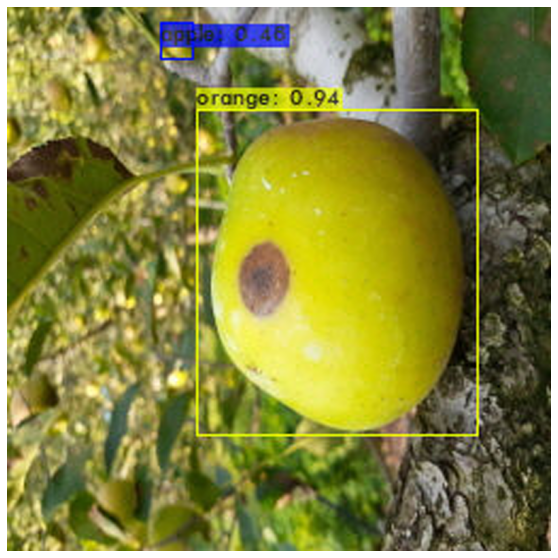

In [ ]:
# 기존 yolo data → apple image detect
!./darknet detect cfg/yolov3.cfg weights/yolov3.weights apple_img/apple_1_215.jpg
imShow('predictions.jpg')

#(8) Custom YOLO

##1. LabelImg를 이용하여 사과와 병든 사과를 커스터마이징

##2. Train

In [ ]:
!./darknet detector train custom/custom_data.data custom/custom-train-yolo.cfg\
    weights/darknet53.conv.74 -dont_show -map

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.915354), count: 2, class_loss = 0.000006, iou_loss = 0.011790, total_loss = 0.011796 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 124690, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.957789), count: 2, class_loss = 0.000000, iou_loss = 0.008246, total_loss = 0.008246 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 A

##3. Test

 CUDA-version: 11010 (11020), cuDNN: 8.0.4, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    256 x 256 x   3 ->  256 x 256 x  32 0.113 BF
   1 conv     64       3 x 3/ 2    256 x 256 x  32 ->  128 x 128 x  64 0.604 BF
   2 conv     32       1 x 1/ 1    128 x 128 x  64 ->  128 x 128 x  32 0.067 BF
   3 conv     64       3 x 3/ 1    128 x 128 x  32 ->  128 x 128 x  64 0.604 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 128 x 128 x  64 0.001 BF
   5 conv    128       3 x 3/ 2    128 x 128 x  64 ->   64 x  64 x 128 0.604 BF
   6 conv     64       1 x 1/ 1     64 x  64 x 128 ->   64 x  64 x  64 0.067 BF
   7 conv    128       3 x 3/ 1     64 x  64 x  64 ->   64 x  64 x 128 0.60

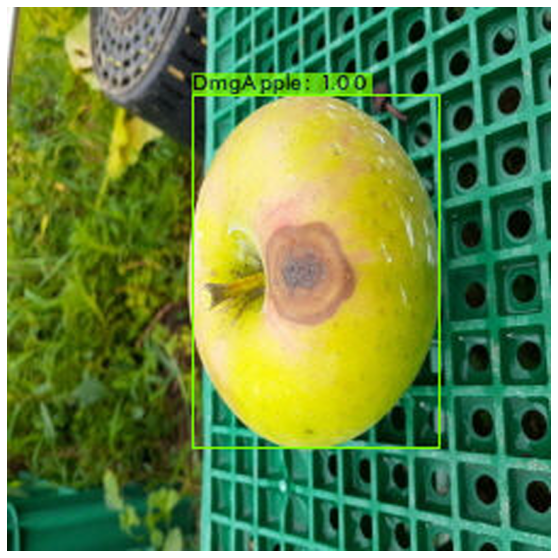

In [11]:
!./darknet detector test custom/custom_data.data custom/custom-train-yolo.cfg \
  backup/custom-train-yolo_final.weights apple_img/apple_1_161.jpg -dont_show

imShow('predictions.jpg')

##4. Apply another photo

 CUDA-version: 11010 (11020), cuDNN: 8.0.4, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    256 x 256 x   3 ->  256 x 256 x  32 0.113 BF
   1 conv     64       3 x 3/ 2    256 x 256 x  32 ->  128 x 128 x  64 0.604 BF
   2 conv     32       1 x 1/ 1    128 x 128 x  64 ->  128 x 128 x  32 0.067 BF
   3 conv     64       3 x 3/ 1    128 x 128 x  32 ->  128 x 128 x  64 0.604 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 128 x 128 x  64 0.001 BF
   5 conv    128       3 x 3/ 2    128 x 128 x  64 ->   64 x  64 x 128 0.604 BF
   6 conv     64       1 x 1/ 1     64 x  64 x 128 ->   64 x  64 x  64 0.067 BF
   7 conv    128       3 x 3/ 1     64 x  64 x  64 ->   64 x  64 x 128 0.60

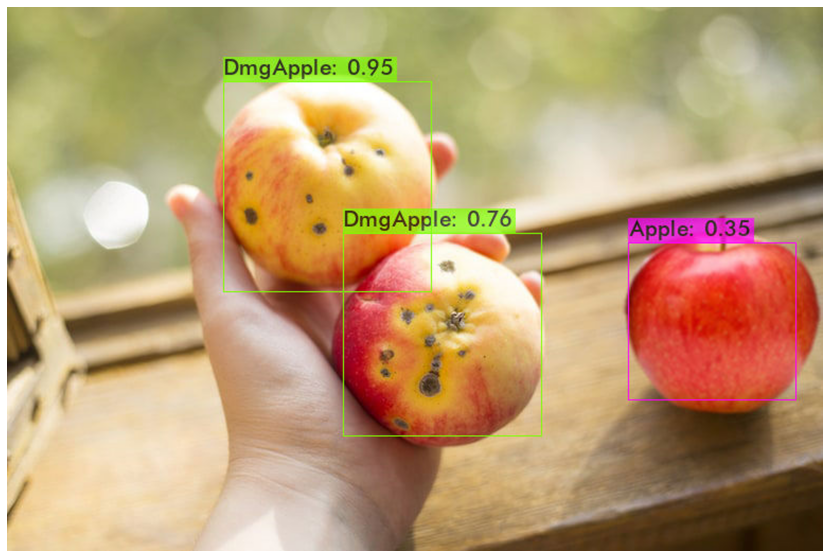

In [26]:
!./darknet detector test custom/custom_data.data custom/custom-train-yolo.cfg \
  backup/custom-train-yolo_final.weights apple_img/apple_val/3.jpg -dont_show

imShow('predictions.jpg')

##5. GUI

GUI code → 더 편하고 쉽게 CUSTOM YOLO 사진 출력 가능